In [2]:
#导入相关包
%matplotlib inline 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime
#切分数据包
from sklearn.model_selection import train_test_split
#归一化
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#导入sklearn中的线性回归（LR）、支持向量机（SVM）、随机森林（RF）、GBDT、XGBoost
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
#评价标准explained_variance_score,mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import precision_score

In [3]:
data =  pd.read_csv('if_no_hsclose.csv',index_col=0)
print(data)
#data['date'] = pd.to_datetime(data['date'])
#data.drop('Unnamed: 0',axis=1)

                 low       open  prev_settlement   limit_up  total_turnover  \
date                                                                          
2010/4/16  3432.4991  3474.0550           0.0000  4078.8000    6.053767e+10   
2010/4/19  3182.7695  3411.3313        3449.8247  3791.3350    1.221630e+11   
2010/4/20  3184.3671  3221.2549        3216.0265  3537.0498    1.476250e+11   
2010/4/21  3221.9223  3229.9454        3231.1313  3553.0555    1.176760e+11   
2010/4/22  3226.0881  3275.4738        3280.1991  3608.1709    1.366030e+11   
2010/4/23  3236.1842  3254.4708        3254.6677  3579.4316    1.188170e+11   
2010/4/26  3226.4668  3256.6018        3250.4444  3573.5603    1.129310e+11   
2010/4/27  3125.5166  3218.1797        3239.0696  3563.7225    1.379510e+11   
2010/4/28  3112.4909  3122.0370        3140.6721  3454.7598    1.255050e+11   
2010/4/29  3100.9880  3158.4839        3152.0509  3465.2988    1.142070e+11   
2010/4/30  3065.3699  3123.3770        3131.6840  34

In [4]:
#print(data.columns)

In [5]:
data.head()

,low,open,prev_settlement,limit_up,total_turnover,limit_down,open_interest,settlement,high,volume,...,TYPPRICE,WCLPRICE,HT_DCPERIOD,HT_DCPHASE,inphase,quadrature,sine,leadsine,HT_TRENDMODE,close
date,,,,,,,,,,,,,,,,,,,,,
2010/4/16,3432.4991,3474.0550,0.0000,4078.8000,6.053767e+10,2719.2000,3590,3449.8247,3514.6585,58457,...,3460.821867,3454.44340,NaN,NaN,NaN,NaN,NaN,NaN,0,3435.3080
2010/4/19,3182.7695,3411.3313,3449.8247,3791.3350,1.221630e+11,3102.1925,5120,3216.0265,3412.9207,123612,...,3268.689533,3254.11175,NaN,NaN,NaN,NaN,NaN,NaN,0,3210.3784
2010/4/20,3184.3671,3221.2549,3216.0265,3537.0498,1.476250e+11,2894.1742,5750,3231.1313,3254.1019,153419,...,3222.650967,3224.35920,NaN,NaN,NaN,NaN,NaN,NaN,0,3229.4839
2010/4/21,3221.9223,3229.9454,3231.1313,3553.0555,1.176760e+11,2907.1458,6319,3280.1991,3295.1011,121023,...,3266.087433,3269.87530,NaN,NaN,NaN,NaN,NaN,NaN,0,3281.2389
2010/4/22,3226.0881,3275.4738,3280.1991,3608.1709,1.366030e+11,2952.1656,6716,3254.6677,3288.6513,140307,...,3255.305800,3254.27385,NaN,NaN,NaN,NaN,NaN,NaN,0,3251.1780


In [6]:
print(data.shape)

(2546, 75)


In [7]:
data = data.dropna(axis=0,how='any')
data.head()

,low,open,prev_settlement,limit_up,total_turnover,limit_down,open_interest,settlement,high,volume,...,TYPPRICE,WCLPRICE,HT_DCPERIOD,HT_DCPHASE,inphase,quadrature,sine,leadsine,HT_TRENDMODE,close
date,,,,,,,,,,,,,,,,,,,,,
2010/8/24,2881.3962,2905.4666,2915.4466,3206.7742,3.067340e+11,2623.9672,31536,2928.5670,2964.9719,350205,...,2922.149367,2921.632025,37.177696,202.992293,151.172472,148.366455,-0.390607,-0.927133,1,2920.0800
2010/8/25,2858.8213,2917.3379,2928.5670,3221.5113,2.926450e+11,2635.9314,32712,2869.6171,2927.8789,337714,...,2883.025667,2877.863450,38.624655,204.411824,145.409832,-79.643158,-0.413292,-0.936132,1,2862.3768
2010/8/26,2854.4381,2890.9748,2869.6171,3156.1286,2.407980e+11,2582.5831,33965,2864.5418,2899.9292,279834,...,2875.435300,2874.561125,38.948406,206.341164,119.377721,-312.255148,-0.443715,-0.947440,1,2871.9386
2010/8/27,2854.7229,2868.1919,2864.5418,3151.2897,2.389470e+11,2578.4296,31482,2874.4130,2881.4486,278254,...,2871.822800,2873.691325,38.302707,210.930146,26.225452,-487.897415,-0.513993,-0.970000,1,2879.2969
2010/8/30,2891.3217,2891.3449,2874.4130,3161.3467,2.339230e+11,2586.8232,34617,2935.2061,2971.3174,266601,...,2933.110600,2934.006125,37.064408,215.023776,-77.226761,-298.725138,-0.573916,-0.984880,1,2936.6927


In [8]:
data.shape

(2458, 75)

In [9]:
print(data.index)

Index(['2010/8/24', '2010/8/25', '2010/8/26', '2010/8/27', '2010/8/30',
       '2010/8/31', '2010/9/1', '2010/9/2', '2010/9/3', '2010/9/6',
       ...
       '2020/9/17', '2020/9/18', '2020/9/21', '2020/9/22', '2020/9/23',
       '2020/9/24', '2020/9/25', '2020/9/28', '2020/9/29', '2020/9/30'],
      dtype='object', name='date', length=2458)


In [10]:
type(data)

pandas.core.frame.DataFrame

In [11]:
train = data[0:1720]
test = data[1720:]

In [12]:
print(type(train))
print(train.shape)
train.head()

<class 'pandas.core.frame.DataFrame'>
(1720, 75)


,low,open,prev_settlement,limit_up,total_turnover,limit_down,open_interest,settlement,high,volume,...,TYPPRICE,WCLPRICE,HT_DCPERIOD,HT_DCPHASE,inphase,quadrature,sine,leadsine,HT_TRENDMODE,close
date,,,,,,,,,,,,,,,,,,,,,
2010/8/24,2881.3962,2905.4666,2915.4466,3206.7742,3.067340e+11,2623.9672,31536,2928.5670,2964.9719,350205,...,2922.149367,2921.632025,37.177696,202.992293,151.172472,148.366455,-0.390607,-0.927133,1,2920.0800
2010/8/25,2858.8213,2917.3379,2928.5670,3221.5113,2.926450e+11,2635.9314,32712,2869.6171,2927.8789,337714,...,2883.025667,2877.863450,38.624655,204.411824,145.409832,-79.643158,-0.413292,-0.936132,1,2862.3768
2010/8/26,2854.4381,2890.9748,2869.6171,3156.1286,2.407980e+11,2582.5831,33965,2864.5418,2899.9292,279834,...,2875.435300,2874.561125,38.948406,206.341164,119.377721,-312.255148,-0.443715,-0.947440,1,2871.9386
2010/8/27,2854.7229,2868.1919,2864.5418,3151.2897,2.389470e+11,2578.4296,31482,2874.4130,2881.4486,278254,...,2871.822800,2873.691325,38.302707,210.930146,26.225452,-487.897415,-0.513993,-0.970000,1,2879.2969
2010/8/30,2891.3217,2891.3449,2874.4130,3161.3467,2.339230e+11,2586.8232,34617,2935.2061,2971.3174,266601,...,2933.110600,2934.006125,37.064408,215.023776,-77.226761,-298.725138,-0.573916,-0.984880,1,2936.6927


In [13]:
print(test.shape)
test.head()

(738, 75)


,low,open,prev_settlement,limit_up,total_turnover,limit_down,open_interest,settlement,high,volume,...,TYPPRICE,WCLPRICE,HT_DCPERIOD,HT_DCPHASE,inphase,quadrature,sine,leadsine,HT_TRENDMODE,close
date,,,,,,,,,,,,,,,,,,,,,
2017/9/20,3818.4941,3823.4109,3824.4957,4206.8308,1.603105e+10,3442.2044,39899,3840.4357,3848.7157,13924,...,3836.377400,3837.763650,26.262147,224.194276,9.634027,12.226534,-0.697093,-0.999901,1,3841.9224
2017/9/21,3829.1222,3843.0834,3840.4357,4224.4181,1.593145e+10,3456.4302,40122,3835.0380,3852.1520,13823,...,3838.240133,3837.041650,26.160211,228.967054,2.384975,-21.446540,-0.754332,-0.997604,1,3833.4462
2017/9/22,3807.9598,3822.4749,3835.0380,4218.4291,1.673882e+10,3451.6415,40048,3823.0447,3834.2896,14594,...,3822.280200,3822.857950,25.860022,234.492318,-9.816210,14.393072,-0.814038,-0.986308,1,3824.5912
2017/9/25,3796.2976,3819.1711,3823.0447,4205.2578,1.547197e+10,3440.8670,40488,3804.9664,3825.1269,13519,...,3806.376667,3804.208875,25.415705,245.276538,11.598991,29.103284,-0.908337,-0.938031,0,3797.7055
2017/9/26,3797.6123,3798.4562,3804.9664,4185.1723,1.307700e+10,3424.5133,39703,3806.7442,3814.6468,11437,...,3807.293433,3807.875375,24.927983,253.403919,11.176734,-12.138089,-0.958342,-0.879616,0,3809.6212


In [54]:
# train = data[data['date'] < datetime(year=2018, month=1, day=1)]
# test = data[data['date'] >= datetime(year=2018, month=1, day=1)]

In [55]:
# X_train = train.iloc[:,1:74]
# y_train = train.iloc[:,74:75]
# X_test = test.iloc[:,1:74]
# y_test = test.iloc[:,74:75]

In [15]:
# print(X_train.head())
# print(y_train.head())
# print(X_test.head())
# print(y_test.head())
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

In [16]:
# sclaer = StandardScaler()
#from sklearn.preprocessing import MinMaxScaler
close_max = data['close'].max() #收盘价的最大值
close_min = data['close'].min() #收盘价的最小值
df = data.apply(lambda x: (x - min(x)) / (max(x) - min(x)))  # min-max标准化

In [17]:
df.head()

,low,open,prev_settlement,limit_up,total_turnover,limit_down,open_interest,settlement,high,volume,...,TYPPRICE,WCLPRICE,HT_DCPERIOD,HT_DCPHASE,inphase,quadrature,sine,leadsine,HT_TRENDMODE,close
date,,,,,,,,,,,,,,,,,,,,,
2010/8/24,0.270028,0.260091,0.261516,0.262454,0.075858,0.262483,0.027115,0.265506,0.264313,0.108373,...,0.261521,0.261946,0.796177,0.689297,0.671674,0.378814,0.304696,0.036433,1.0,0.263200
2010/8/25,0.263117,0.263673,0.265506,0.266523,0.072309,0.266521,0.032134,0.247580,0.253078,0.104445,...,0.249547,0.248597,0.842899,0.693243,0.667296,0.319800,0.293354,0.031934,1.0,0.245787
2010/8/26,0.261775,0.255718,0.247580,0.248471,0.059249,0.248517,0.037481,0.246036,0.244612,0.086243,...,0.247224,0.247590,0.853353,0.698606,0.647520,0.259594,0.278142,0.026280,1.0,0.248672
2010/8/27,0.261862,0.248843,0.246036,0.247135,0.058782,0.247115,0.026885,0.249038,0.239015,0.085746,...,0.246118,0.247324,0.832503,0.711362,0.576752,0.214133,0.243004,0.015000,1.0,0.250893
2010/8/30,0.273066,0.255830,0.249038,0.249912,0.057517,0.249947,0.040263,0.267525,0.266235,0.082082,...,0.264876,0.265719,0.792519,0.722741,0.498159,0.263096,0.213042,0.007560,1.0,0.268213


In [27]:
df.index

Index(['2010/8/24', '2010/8/25', '2010/8/26', '2010/8/27', '2010/8/30',
       '2010/8/31', '2010/9/1', '2010/9/2', '2010/9/3', '2010/9/6',
       ...
       '2020/9/17', '2020/9/18', '2020/9/21', '2020/9/22', '2020/9/23',
       '2020/9/24', '2020/9/25', '2020/9/28', '2020/9/29', '2020/9/30'],
      dtype='object', name='date', length=2458)

In [53]:
df.to_csv('if_std.csv')

In [69]:
# train = data[0:1720]
# test = data[1720:]
# X_train = sclaer.fit_transform(X_train)
# y_train = sclaer.fit_transform(y_train)
# X_test = scaler.fit_transform(X_test)
# y_test = sclaer.fit_transform(y_test)

In [18]:
train = df[0:1720]
test = df[1720:]
X_train = train.iloc[:,1:74]
y_train = train.iloc[:,74:75]
X_test = test.iloc[:,1:74]
y_test = test.iloc[:,74:75]

In [19]:
X_train.head()

,open,prev_settlement,limit_up,total_turnover,limit_down,open_interest,settlement,high,volume,hsclose,...,MEDPRICE,TYPPRICE,WCLPRICE,HT_DCPERIOD,HT_DCPHASE,inphase,quadrature,sine,leadsine,HT_TRENDMODE
date,,,,,,,,,,,,,,,,,,,,,
2010/8/24,0.260091,0.261516,0.262454,0.075858,0.262483,0.027115,0.265506,0.264313,0.108373,0.252499,...,0.261261,0.261521,0.261946,0.796177,0.689297,0.671674,0.378814,0.304696,0.036433,1.0
2010/8/25,0.263673,0.265506,0.266523,0.072309,0.266521,0.032134,0.247580,0.253078,0.104445,0.231437,...,0.252071,0.249547,0.248597,0.842899,0.693243,0.667296,0.319800,0.293354,0.031934,1.0
2010/8/26,0.255718,0.247580,0.248471,0.059249,0.248517,0.037481,0.246036,0.244612,0.086243,0.233602,...,0.247091,0.247224,0.247590,0.853353,0.698606,0.647520,0.259594,0.278142,0.026280,1.0
2010/8/27,0.248843,0.246036,0.247135,0.058782,0.247115,0.026885,0.249038,0.239015,0.085746,0.236195,...,0.244289,0.246118,0.247324,0.832503,0.711362,0.576752,0.214133,0.243004,0.015000,1.0
2010/8/30,0.255830,0.249038,0.249912,0.057517,0.249947,0.040263,0.267525,0.266235,0.082082,0.253473,...,0.263766,0.264876,0.265719,0.792519,0.722741,0.498159,0.263096,0.213042,0.007560,1.0


In [20]:
#分别使用线性回归LR、随机森林(RF)、GBDT、支持向量机（SVM）、XBGoost五种方法进行股票价格的预测
#LR
lr=LinearRegression()
lr.fit(X_train, y_train)
prediction1=lr.predict(X_test)
#prediction1 = prediction1.inverse_transform(prediction1)
print(prediction1)
evs1 = explained_variance_score(prediction1,y_test) 
mae1 = mean_absolute_error(prediction1,y_test)
mse1 = mean_squared_error(prediction1,y_test)
r2s1 = r2_score(prediction1,y_test)
print("LF:","evs1:",evs1,"mae1:",mae1,"mse1:",mse1,"r2s1:",r2s1)
print("precesion:",precision_score)

#RF
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
prediction2=lr.predict(X_test)
#print(prediction2)
evs2 = explained_variance_score(prediction2,y_test) 
mae2 = mean_absolute_error(prediction2,y_test)
mse2 = mean_squared_error(prediction2,y_test)
r2s2 = r2_score(prediction2,y_test)
print("RF:","evs2:",evs2,"mae2:",mae2,"mse2:",mse2,"r2s2:",r2s2)

#GBDT
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
prediction3 = gbr.predict(X_test)
#print(prediction3)
evs3 = explained_variance_score(prediction3,y_test) 
mae3 = mean_absolute_error(prediction3,y_test)
mse3 = mean_squared_error(prediction3,y_test)
r2s3 = r2_score(prediction3,y_test)
print("GBDT:","evs3:",evs3,"mae3:",mae3,"mse3:",mse3,"r2s3:",r2s3)

#SVM
svr = SVR()
svr.fit(X_train, y_train)
prediction4 = svr.predict(X_test)
#print(prediction4)
evs4 = explained_variance_score(prediction4,y_test) 
mae4 = mean_absolute_error(prediction4,y_test)
mse4 = mean_squared_error(prediction4,y_test)
r2s4 = r2_score(prediction4,y_test)
print("SVR:","evs4:",evs4,"mae4:",mae4,"mse4:",mse4,"r2s4:",r2s4)

#XGBoost
model = XGBRegressor(max_depth=5, learning_rate=0.1, n_estimators=200, silent=True, objective='reg:gamma')
model.fit(X_train, y_train)
prediction5 = model.predict(X_test)
#print(prediction5)
evs5 = explained_variance_score(prediction5,y_test) 
mae5 = mean_absolute_error(prediction5,y_test)
mse5 = mean_squared_error(prediction5,y_test)
r2s5 = r2_score(prediction5,y_test)
print("XGBoost：","evs5:",evs5,"mae5:",mae5,"mse5:",mse5,"r2s5:",r2s5)

[[0.54138532]
 [0.53882745]
 [0.53615527]
 [0.52804195]
 [0.53163776]
 [0.53364915]
 [0.53688507]
 [0.54224833]
 [0.55531118]
 [0.55609744]
 [0.5589875 ]
 [0.56305936]
 [0.56842047]
 [0.56363327]
 [0.5613721 ]
 [0.56668864]
 [0.56314422]
 [0.56209224]
 [0.56480685]
 [0.57160192]
 [0.57809359]
 [0.58652489]
 [0.59473653]
 [0.58296257]
 [0.58660341]
 [0.5828122 ]
 [0.58424712]
 [0.57654674]
 [0.59030119]
 [0.6031681 ]
 [0.60248233]
 [0.61251588]
 [0.6232171 ]
 [0.62727118]
 [0.61903996]
 [0.61046353]
 [0.62121944]
 [0.62446079]
 [0.63315077]
 [0.65964137]
 [0.66105341]
 [0.61942007]
 [0.62002002]
 [0.59591175]
 [0.60202557]
 [0.60001514]
 [0.58352909]
 [0.58285925]
 [0.58918959]
 [0.59440718]
 [0.58495574]
 [0.57320324]
 [0.58787839]
 [0.60875373]
 [0.59131321]
 [0.60223358]
 [0.59681259]
 [0.58180619]
 [0.5850294 ]
 [0.60230857]
 [0.59799125]
 [0.61423751]
 [0.61064526]
 [0.60454351]
 [0.61062634]
 [0.58727503]
 [0.59883283]
 [0.60178937]
 [0.62126621]
 [0.62683796]
 [0.63091908]
 [0.63

C:\Users\123\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\123\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RF: evs2: 1.0 mae2: 5.121618275523504e-16 mse2: 3.280114442086246e-31 r2s2: 1.0


C:\Users\123\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GBDT: evs3: 0.9976126188108018 mae3: 0.0042709797802900655 mse3: 3.4480861467996935e-05 r2s3: 0.9975795653919811
SVR: evs4: 0.9312389343691911 mae4: 0.03732286640026292 mse4: 0.0019293944810677534 r2s4: 0.8034573267287056


C:\Users\123\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\123\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


XGBoost： evs5: 0.9981992687463856 mae5: 0.003995918623021054 mse5: 3.020144345311175e-05 r2s5: 0.9978722920162687


In [21]:
prediction1[0][0]

0.5413853230793166

In [52]:
for i in range(len(prediction1)):
    list = []
    prediction_raw =prediction1[i][0]*(close_max-close_min)+close_min
    print('预测值是%.2f'%(prediction_raw))
    prediction_raw_list = list.append(prediction_raw)
    return prediction_raw_list
    #prediction_raw = prediction_raw.tolist
    

SyntaxError: 'return' outside function (<ipython-input-52-a45da6237057>, line 6)

In [51]:
type(prediction_raw_list)

NoneType

In [47]:
type(prediction_raw)

builtin_function_or_method

ValueError: x and y must have same first dimension, but have shapes (738,) and (1,)

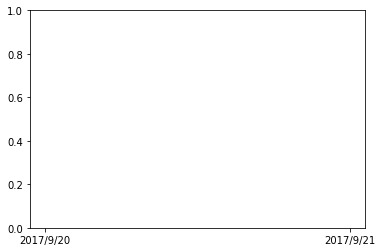

In [36]:
plt.plot(X_test.index,prediction_raw, c='blue',ls='--',label="LR")
# plt.plot(df['date'],prediction2, c='green',label='RF',lw=4)
# plt.plot(df['date'],prediction3, c='yellow',label='GBR')
# plt.plot(df['date'],prediction4, c='black',ls=':',label='SVR',lw=4)
# plt.plot(df['date'],prediction5, c='purple',label='XGBoost',lw=4)
# plt.plot(df['date'], y_test, c='red', label="actual")

plt.xticks(rotation=45)
plt.xlabel("date",fontsize=14)
plt.ylabel("Stock price ", fontsize=14)
plt.legend()
plt.tight_layout()
plt.savefig("stockprice1")
plt.show()